In [1]:
import pickle
import os
import numpy as np
import pylab
import io
from PIL import Image
from numpy import linalg as LA
import pandas as pd
from sklearn.cluster import KMeans

In [9]:
image_data=open('./feature.txt','rb')
image_load=pickle.load(image_data)
image_df = pd.DataFrame(image_load)

In [10]:
name_data=open('./names.txt','rb')
name_load=pickle.load(name_data)
name_df = pd.DataFrame(name_load)

In [11]:
word_data=open('./label_w2vfeature.txt','rb')
word_load=pickle.load(word_data)
word_df = pd.DataFrame(word_load)

In [15]:
image_df

,0,1,2,3,4,5,6,7,8,9,...,502,503,504,505,506,507,508,509,510,511
0,0.000000,0.000000,0.004685,0.000000,0.000000,0.036426,0.013780,0.000915,0.084309,0.035822,...,0.047573,0.060589,0.063224,0.001284,0.091518,0.015746,0.034198,0.061071,0.013651,0.036816
1,0.027196,0.000000,0.043014,0.039376,0.074930,0.042380,0.012699,0.053023,0.000000,0.000000,...,0.030673,0.015484,0.034730,0.000000,0.008370,0.012531,0.000000,0.031925,0.068793,0.004927
2,0.000000,0.015604,0.003944,0.000000,0.003436,0.024914,0.000000,0.014383,0.006291,0.034602,...,0.017187,0.075896,0.110132,0.078373,0.000000,0.003711,0.089949,0.000000,0.021746,0.016110
3,0.017912,0.035930,0.000000,0.018024,0.037549,0.034663,0.000000,0.030827,0.000000,0.000000,...,0.010633,0.044580,0.003921,0.000000,0.017305,0.097572,0.075238,0.027324,0.033634,0.049583
4,0.052985,0.016883,0.000000,0.000000,0.012842,0.111501,0.001204,0.061720,0.013982,0.039602,...,0.041960,0.008182,0.008754,0.029614,0.041558,0.000000,0.021227,0.082774,0.012081,0.145552
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0.037940,0.000000,0.015565,0.020620,0.013811,0.019821,0.042905,0.023561,0.000000,0.020772,...,0.010356,0.002784,0.046706,0.000000,0.048389,0.020805,0.058638,0.023868,0.028482,0.026762
10679,0.034549,0.055177,0.075164,0.124826,0.002472,0.045547,0.019261,0.002231,0.000000,0.060398,...,0.082447,0.046202,0.000000,0.134093,0.039146,0.011226,0.059605,0.142944,0.019860,0.040150
10680,0.004186,0.000823,0.000000,0.000000,0.018609,0.058170,0.038985,0.128926,0.042802,0.029914,...,0.000000,0.026989,0.000000,0.017349,0.000000,0.016489,0.002815,0.069881,0.018354,0.102038
10681,0.000000,0.003175,0.004204,0.000000,0.017764,0.059543,0.086710,0.000000,0.047520,0.000000,...,0.017523,0.000000,0.032701,0.000000,0.013419,0.000000,0.000000,0.027754,0.019904,0.046096


In [31]:
image_samples=image_df.values 
name_samples=name_df.values
word_samples=word_df.values

In [20]:
name_samples

array([['COCO_train2014_000000000036.jpg'],
       ['COCO_train2014_000000000109.jpg'],
       ['COCO_train2014_000000000151.jpg'],
       ...,
       ['COCO_train2014_000000581719.jpg'],
       ['COCO_train2014_000000581732.jpg'],
       ['COCO_train2014_000000581738.jpg']], dtype=object)

In [35]:
kmeans=KMeans(n_clusters=100)
kmeans_word = KMeans(n_clusters=100)

In [21]:
kmeans.fit(image_samples)

KMeans(n_clusters=100)

In [36]:
kmeans_label.fit(word_samples)

KMeans(n_clusters=100)

In [29]:
image_label=kmeans.predict(image_samples)
print(image_label, name_df[image_label==0] )

[39 11 66 ... 89  7 49]                                      0
27     COCO_train2014_000000001924.jpg
177    COCO_train2014_000000011004.jpg
183    COCO_train2014_000000011265.jpg
190    COCO_train2014_000000011673.jpg
198    COCO_train2014_000000012107.jpg
...                                ...
10225  COCO_train2014_000000558011.jpg
10323  COCO_train2014_000000562791.jpg
10324  COCO_train2014_000000562819.jpg
10646  COCO_train2014_000000579739.jpg
10672  COCO_train2014_000000581073.jpg

[90 rows x 1 columns]


In [37]:
word_label=kmeans_label.predict(word_samples)
print(word_label, name_df[word_label==0] )

[12 42 59 ...  3 14 10]                                      0
37     COCO_train2014_000000002536.jpg
122    COCO_train2014_000000007201.jpg
157    COCO_train2014_000000009946.jpg
224    COCO_train2014_000000013355.jpg
229    COCO_train2014_000000013540.jpg
...                                ...
10587  COCO_train2014_000000576625.jpg
10592  COCO_train2014_000000576938.jpg
10605  COCO_train2014_000000577411.jpg
10637  COCO_train2014_000000578961.jpg
10655  COCO_train2014_000000580235.jpg

[213 rows x 1 columns]


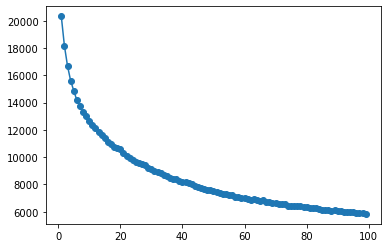

In [38]:
inertia=[]

for i in range(1,100):  
    km=KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
    km.fit(word_samples)
    inertia.append(km.inertia_)
import matplotlib.pyplot as plt
plt.plot(range(1,100),inertia,'o-')